In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'%.5f'

In [47]:
import math
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy.optimize as opt
np.set_printoptions(suppress=True)

In [37]:
points = np.array([
    [0, 10],
    [7, -7],
    [-7, -7]
])
def objective(p):
    print([np.linalg.norm(p - point) for point in points])
    return np.mean([np.linalg.norm(p - point) for point in points])

# # objective(np.array([0, 0]))
# sol = opt.minimize(objective, np.array([1, 5]),
#     # constraints=[
#     #     {'type': 'ineq', 'fun': lambda x: x[0] + 5},
#     #     {'type': 'ineq', 'fun': lambda x: x[1] + 5},
#     #     {'type': 'ineq', 'fun': lambda x: x[0] - 5},
#     #     {'type': 'ineq', 'fun': lambda x: x[1] - 5},
#     # ]
#     bounds=((-5, 5), (-5, 5)),
# )
# print(sol.x)
print(objective(np.array([0, 0])))

[10.0, 9.899494936611665, 9.899494936611665]
9.932996624407778


In [82]:
p_func = lambda d: 0.32 * math.e**(-((d-6.5)/32.6))

# p_func = lambda d: min(20/d, 1)*(1 - math.e**(-d/39)) + math.e**(- d/39)
# print(objective(np.array([0, 0])))


d = 10
probs, xs = [], []
for i in range(1, 10):
    nlos_prob_per_sbs = 1 - p_func(d)
    nlos_prob = nlos_prob_per_sbs**i
    xs.append(i)
    probs.append(nlos_prob)
    print(f'{i}: {nlos_prob:.5f}')

1: 0.71258
2: 0.50776
3: 0.36182
4: 0.25782
5: 0.18372
6: 0.13091
7: 0.09329
8: 0.06647
9: 0.04737


In [76]:

min(20/d, 1)*(1 - math.e**(-d/39)) + math.e**(- d/39)

1.00000

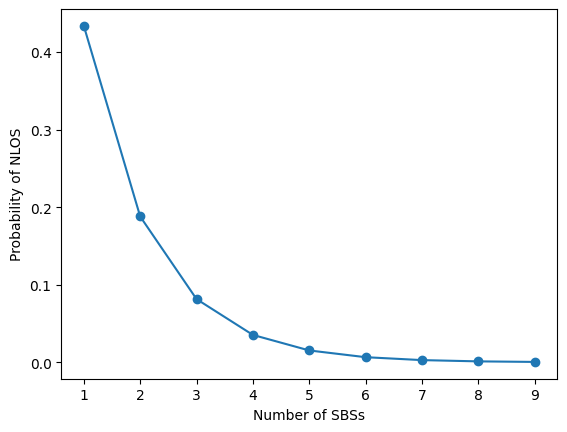

In [78]:
plt.plot(xs, probs, marker = 'o')
plt.xlabel('Number of SBSs')
plt.ylabel('Probability of NLOS')
plt.show()

In [61]:
p_func(10)

0.28742

In [ ]:
from dataclasses import dataclass, field

from typing import Dict, List, Tuple, Optional, Callable, Any

import math
import numpy as np
from PIL import Image

from pysolotools.consumers import Solo
from pysolotools.converters.solo2coco import SOLO2COCOConverter
from pysolotools.core.models import KeypointAnnotationDefinition, RGBCameraCapture
from pysolotools.core.models import BoundingBox2DLabel, BoundingBox2DAnnotation
from pysolotools.core.models import BoundingBox3DLabel, BoundingBox3DAnnotation
from pysolotools.core.models import Frame, Capture
from scipy.spatial.transform import Rotation as R

from torchvision.datasets import ImageFolder
from torchvision.models import swin_v2_t, Swin_V2_T_Weights
from torchvision.models import swin_v2_b, Swin_V2_B_Weights
# from torch.utils.data import ConcatDataset, DataLoader
from collections import OrderedDict
from torch.utils.data import DataLoader

import torch
from torch import nn, Tensor
from torch.nn import functional as F

import lightning.pytorch as pl

import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

import reader
import network
from my_trainer import HungarianMatcher, SetCriterion

# %matplotlib ipympl

In [ ]:
train_folder = 'D:/Unity/dataset/solo_34'
solo = Solo(data_path=train_folder)
# collecting paths and labels
for frame in solo.frames():
    for capture in frame.captures:
        anno_3d = [
            anno for anno in capture.annotations 
            if isinstance(anno, BoundingBox3DAnnotation)
        ][0]
        r = R.from_quat(capture.rotation)
        for bbox in anno_3d.values:
            print(
                np.array(r.apply(bbox.translation) + capture.position)
            )
        break
    
    capture = frame.captures[0]
    anno_3d = [
        anno for anno in capture.annotations 
        if isinstance(anno, BoundingBox3DAnnotation)
    ][0]
    r = R.from_quat(capture.rotation)
    for bbox in anno_3d.values:
        print(
            np.array(r.apply(bbox.translation) + capture.position)
        )
    break